In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#using latin encoding because utf-8 and utf-16 cannot recognise unidentified characters in the data and so are unable to load the data.
df0 = pd.read_csv('Questionnaire_datasetIA.csv', encoding = 'latin-1' )
df1 = pd.read_csv('Questionnaire_datasetIB.csv', encoding = 'latin-1')

In [ ]:
df0.head(5)

In [ ]:
df1.head(5)

In [ ]:
print(df0.info())

In [ ]:
print(df1.info())

#    EDA    

In [ ]:
#checking for null values
plt.figure(figsize=(4,2))
sns.heatmap(df0.isnull(), cbar = False)
#no null values

In [ ]:
df0.drop(['Participant nr', 'NR', 'Created'], axis = 1, inplace = True)

In [ ]:
df0['I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate'].unique()

array(['Yes'], dtype=object)

In [ ]:
df0.drop('I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate', axis = 1, inplace = True)

In [ ]:
df0['I want to participate.'].unique()

array(['Proceed'], dtype=object)

In [ ]:
df0.drop('I want to participate.', axis = 1, inplace = True)

In [ ]:
#extracting the HH:MM of the full timestamp
df0['Modified']= (pd.to_datetime(df0['Modified'])).dt.strftime('%H:%M')
df0['Modified'][0:4]

0    15:13
1    11:23
2    09:17
3    13:20
Name: Modified, dtype: object

In [ ]:
#converting the elapsed time to seconds
def sec_calc(time):
    time = time.split(' ')
    sec_time = int(time[0])*60 + int(time[2])
    return sec_time 
df0['Elapsed'] = df0['Elapsed time'].apply(sec_calc)
df0.drop('Elapsed time', axis = 1, inplace = True)
df1['Elapsed'] = df1['Elapsed time'].apply(sec_calc)
df1.drop('Elapsed time', axis = 1, inplace = True)

In [ ]:
df0.head(5)

,Modified,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",I often get emotionally involved with my friends problems.,I am inclined to get nervous when others around me seem to be nervous.,People I am with have a strong influence on my mood.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed
0,15:13,3,3,4,4,3,4,3,3,2,...,1,4,4,4,1,3,4,134,108,305
1,11:23,3,3,4,4,4,3,3,2,3,...,2,4,3,3,4,2,2,133,105,355
2,09:17,2,2,3,4,3,3,3,3,3,...,3,3,3,3,3,3,3,116,81,409
3,13:20,2,3,4,3,2,4,4,4,3,...,2,3,4,4,2,4,2,114,96,519
4,14:53,3,3,4,4,3,4,4,1,3,...,1,4,2,1,4,4,4,138,106,447


<Axes: >

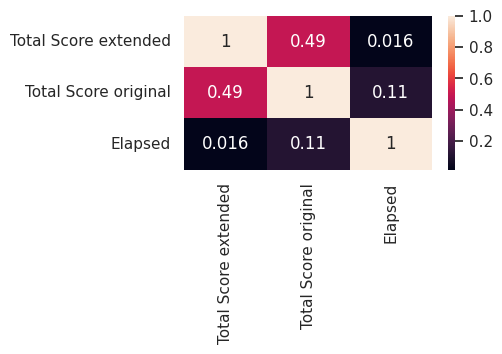

In [ ]:
#checking the correlatio
plt.figure(figsize= (4,2))
sns.heatmap(df0.iloc[:, 41:].corr(), annot = True)

The correlation between time elapsed and the total score original is very low and that between time elapsed and total score extended way lower, keeping it for training could be more detrimental than beneficial. 

In [ ]:
X = df0.drop(['Total Score original','Total Score extended', 'Modified'], axis = 1)
y_train = df0['Total Score original']

In [ ]:
from sklearn. feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Using anova function to select the 15 best features
selector =SelectKBest(f_classif, k=15)
X_reduced = selector.fit_transform(X, y_train)
X_reduced.shape

(60, 15)

In [ ]:
X_reduced

In [ ]:
cols = selector.get_feature_names_out()
cols

In [ ]:
#Visualizing the new feature data
X_train = pd.DataFrame(X_reduced, columns= cols)
X_train.head(5)

## Feature Selection for the test set data (df1)

In [ ]:
y_test = df1['Total Score original']
X_test = df1[cols]
X_test.head(5)

,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.",I often get emotionally involved with my friends problems.,I am happy when I am with a cheerful group and sad when the others are glum.,I can easily tell if someone else wants to enter a conversation.,I can pick up quickly if someone says one thing but means another.,I find it easy to put myself in somebody elses shoes.,I am quick to spot when someone in a group is feeling awkward or uncomfortable.,Other people tell me I am good at understanding how they are feeling and what they are thinking.,I can easily tell if someone else is interested or bored with what I am saying.,Friends talk to me about their problems as they say that I am very understanding.,I can tell if someone is masking their true emotion.,I am good at predicting what someone will do.,Before I do something I try to consider how my friends will react to it.,I try to be patient when people speak with me very slowly.
0,4,4,4,4,3,3,4,4,4,4,4,3,3,4,4
1,4,4,3,3,3,3,3,3,4,3,4,3,3,3,4
2,4,4,4,4,3,3,4,3,3,3,3,2,2,3,3
3,3,2,3,3,4,3,3,4,4,3,4,3,3,4,3
4,3,3,4,3,4,4,3,4,4,4,4,4,3,3,4


In [ ]:
#model selection and initialization 
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=20000,
                     tol=1e-3,
                     learning_rate='invscaling',
                     n_iter_no_change=6,
                     random_state=32)
#fitting the model to the training data
sgd.fit(X_train,y_train)
#predicting the empathy scores on the test set
y_pred = np.rint(sgd.predict(X_test))
#evaluating the model 
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ',mean_squared_error(y_test, y_pred, squared= False))
print('Explained Variance Score:',explained_variance_score(y_test, y_pred))

# trained for before stopping
coef = dict(zip(X_train.columns, sgd.coef_.T))
print('Feature Coefficients:',coef)
print('Number of Iterations:',sgd.n_iter_)

MAE:  4.266666666666667
RMSE:  5.406785859763019
Explained Variance Score: 0.9120671264639582
Feature Coefficients: {'I sometimes try to understand my friends better by imagining how things look from their perspective.': 1.9117586817113668, 'When I am upset at someone, I usually try to \x91put myself in his shoes for a while.': 0.9398944816385805, 'I often get emotionally involved with my friends\x92 problems.': 2.393517618633318, 'I am happy when I am with a cheerful group and sad when the others are glum.': 2.611317267189466, 'I can easily tell if someone else wants to enter a conversation.': 2.3876973207613124, 'I can pick up quickly if someone says one thing but means another.': 2.549141683672567, 'I find it easy to put myself in somebody elses shoes.': 2.45037916387075, 'I am quick to spot when someone in a group is feeling awkward or uncomfortable.': 2.002365994573103, 'Other people tell me I am good at understanding how they are feeling and what they are thinking.': 0.0552547311

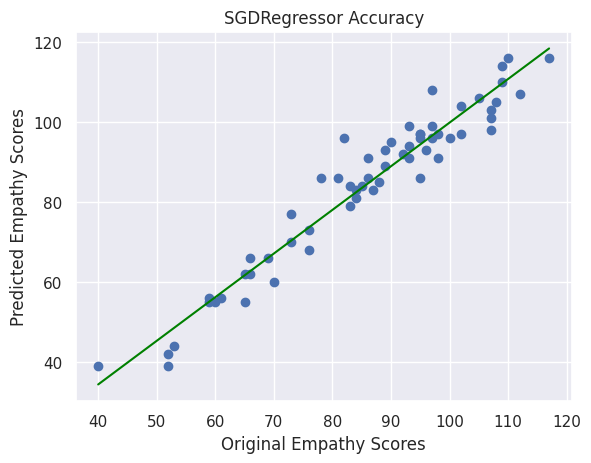

In [ ]:
#visualizing the model's prediction accuracy 
#creating a scatterplot of the values
plt.scatter(y_test,y_pred,cmap = 'viridis')
#drawing a line of best fit
plt.plot (np.unique (y_test), np.poly1d (np.polyfit (y_test,y_pred, 1))(np.unique (y_test)), color = 'green') 
#adding titles and labels 
plt.title('SGDRegressor Accuracy')
plt.xlabel('Original Empathy Scores')
plt.ylabel('Predicted Empathy Scores')
plt.show() 